# importing  libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             ##importing libraries
import seaborn as sns
from sklearn import preprocessing 
import scipy.stats as stats
import statsmodels.api as sm

# Reading Data

In [2]:
df=pd.read_csv('car data.csv')              ##reading data

In [3]:
df.head()                                   ##Printing top 5 rows of data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Label Encoding

In [4]:
le = preprocessing.LabelEncoder()           ##Creating obejct of label encoder  

In [5]:
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])        ##applying label encoding so that machine can read them.
df['Owner'] = le.fit_transform(df['Owner'])                     
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [7]:
##Fuel_Type=   0=cng,1=disel,2=petrol
##Seller_Type= 0=dealer,1=individual
##Transmission= 0=Automatic,1=Manual

In [8]:
df=df.drop(['Car_Name'],axis=1)             ##droping car name

In [9]:
df.info()                                  ## printing some information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int32  
 5   Seller_Type    301 non-null    int32  
 6   Transmission   301 non-null    int32  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 15.4 KB


# Handling missing value

In [10]:
df.isnull().sum()                             ##checking null values

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.duplicated().sum()                           ##checking duplicate rows

2

In [12]:
df=df.drop_duplicates(keep=False)              ##droping duplicate rows
df.duplicated().sum()

0

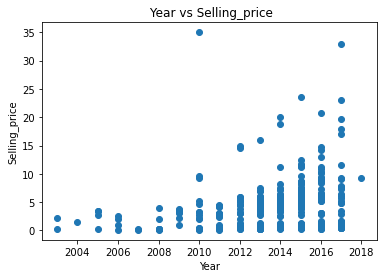

In [13]:
plt.scatter(df.Year, df.Selling_Price)                  ## plotting graph of year vs selling price
plt.xlabel("Year")                                       
plt.ylabel("Selling_price")                             ## Here we found as the age of car increase Selling price decrease   
plt.title(" Year vs Selling_price")
plt.show()

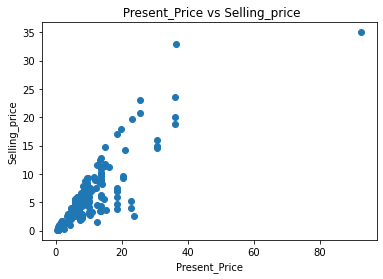

In [14]:
plt.scatter(df.Present_Price, df.Selling_Price)          ## plotting graph of present price vs selling price
plt.xlabel("Present_Price")
plt.ylabel("Selling_price")
plt.title(" Present_Price vs Selling_price")             ## Here we found as present price increase selling price also increase.
plt.show()

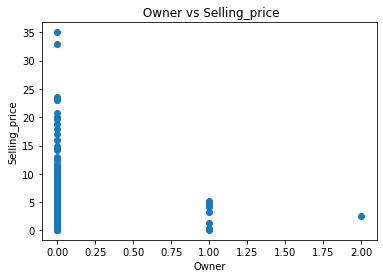

In [15]:
plt.scatter(df.Owner, df.Selling_Price)          ## plotting graph of Owner vs selling price
plt.xlabel("Owner")
plt.ylabel("Selling_price")
plt.title(" Owner vs Selling_price")             ## Here we found as Owner_no increase selling price also decrease.
plt.show()

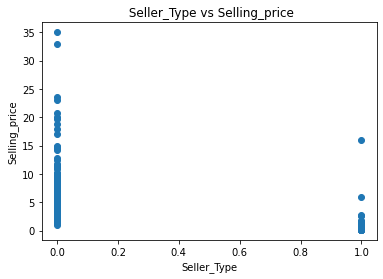

In [16]:
plt.scatter(df.Seller_Type, df.Selling_Price)          ## plotting graph of Owner vs selling price
plt.xlabel("Seller_Type")
plt.ylabel("Selling_price")
plt.title(" Seller_Type vs Selling_price")             ##0=dealer,1=individual.
plt.show()                                             ## here we found dealer are selling at high price

In [17]:
from sklearn import preprocessing                  ##importing preprocessing library
scaler = preprocessing.MinMaxScaler()              
names = df.columns
d = scaler.fit_transform(df)                        ##scaling data so that machine will treat all data equally
scaled_df = pd.DataFrame(d, columns=names)

In [18]:
scaled_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.733333,0.093123,0.057109,0.053053,1.0,0.0,1.0,0.0
1,0.666667,0.133238,0.099913,0.085085,0.5,0.0,1.0,0.0
2,0.933333,0.204871,0.103273,0.012813,1.0,0.0,1.0,0.0
3,0.533333,0.078797,0.041504,0.009409,1.0,0.0,1.0,0.0
4,0.733333,0.128940,0.070980,0.083984,0.5,0.0,1.0,0.0


In [19]:
X = scaled_df[['Year','Kms_Driven','Fuel_Type','Transmission','Owner','Seller_Type','Present_Price']]
y=scaled_df[['Selling_Price']]                        ##splitting data in target variable.

In [20]:
from sklearn.model_selection import train_test_split  ##importing train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)   ##splitting data in train and test.


In [22]:
X_test.head()             ##printing X_test

,Year,Kms_Driven,Fuel_Type,Transmission,Owner,Seller_Type,Present_Price
179,0.666667,0.041041,1.0,1.0,0.0,1.0,0.001625
271,0.866667,0.060567,1.0,0.0,0.0,0.0,0.143910
225,0.600000,0.103367,0.5,1.0,0.0,0.0,0.070113
7,0.800000,0.065924,0.5,1.0,0.0,0.0,0.089835
173,0.866667,0.047047,1.0,0.0,0.0,1.0,0.002709


In [49]:
y

,Selling_Price
0,0.093123
1,0.133238
2,0.204871
3,0.078797
4,0.128940
...,...
292,0.269341
293,0.111748
294,0.093123
295,0.326648


# Linear regression

In [23]:
from sklearn.linear_model import LinearRegression    ##importing linear regression

In [24]:
lm = LinearRegression()             ##making object of linear regression

In [25]:
lm.fit(X_train,y_train)              ##fitting our model

LinearRegression()

In [26]:
predictions = lm.predict(X_test)       ## Making prediciton on X_test

In [27]:
predictions                            ##printing  predictions

array([[ 8.89277223e-04],
       [ 2.69551943e-01],
       [ 1.37241129e-01],
       [ 2.00214686e-01],
       [ 7.57716196e-02],
       [ 1.72911184e-01],
       [ 4.33840141e-05],
       [-2.27924192e-02],
       [ 1.25272296e-01],
       [-7.30539605e-03],
       [ 1.48118821e-01],
       [ 1.25713084e-01],
       [-1.16256092e-01],
       [ 7.78338364e-02],
       [ 2.92377592e-01],
       [ 1.19733717e-01],
       [ 7.01697137e-02],
       [ 2.56205288e-01],
       [ 2.40232568e-01],
       [ 1.27403772e-01],
       [ 5.56274426e-02],
       [ 5.21049565e-02],
       [ 5.88566017e-02],
       [ 2.71996462e-02],
       [ 4.46251161e-02],
       [ 1.79181873e-01],
       [ 1.46596328e-01],
       [ 1.19984978e-01],
       [ 5.44833442e-03],
       [ 4.06372822e-02],
       [ 5.29396210e-02],
       [ 3.26903994e-01],
       [ 8.35489745e-02],
       [ 2.73880753e-01],
       [ 8.99985057e-02],
       [ 2.21623126e-01],
       [ 1.77523621e-02],
       [ 1.44506633e-02],
       [ 5.7

In [28]:
y_test.head()       

,Selling_Price
179,0.004871
271,0.309456
225,0.085960
7,0.183381
173,0.007163


In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score             

In [30]:
score=r2_score(y_test,predictions)
print('r2 score is ',score)                                             ## calculalting r^2 score,MSE,RMSE.
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r2 score is  0.8333431697377914
MSE: 0.0016044549324436494
RMSE: 0.04005564794687073


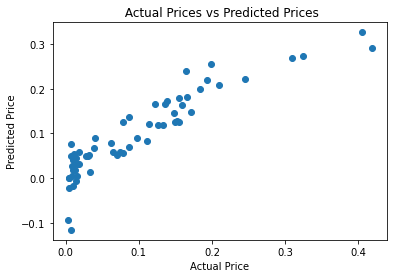

In [31]:
plt.scatter(y_test, predictions)       ##ploting graph between Actualselling price and predicted selling price
plt.xlabel("Actual Price")             
plt.ylabel("Predicted Price")          ##Here we found that Actualselling price and predicted selling price are almost equall.
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Assumption

In [32]:
corr=X.corr()                                   ##Checking weather independent variable are corellated with each other or not.
corr.style.background_gradient(cmap='coolwarm')

,Year,Kms_Driven,Fuel_Type,Transmission,Owner,Seller_Type,Present_Price
Year,1.000000,-0.527109,-0.038479,0.006618,-0.170146,-0.033682,-0.059814
Kms_Driven,-0.527109,1.000000,-0.167815,-0.165302,0.062084,-0.100634,0.206938
Fuel_Type,-0.038479,-0.167815,1.000000,0.056032,0.053787,0.343277,-0.422626
Transmission,0.006618,-0.165302,0.056032,1.000000,-0.021956,0.053911,-0.319011
Owner,-0.170146,0.062084,0.053787,-0.021956,1.000000,0.122465,-0.016407
Seller_Type,-0.033682,-0.100634,0.343277,0.053911,0.122465,1.000000,-0.511354
Present_Price,-0.059814,0.206938,-0.422626,-0.319011,-0.016407,-0.511354,1.000000


In [33]:
# Levene test for Homoscedasticity
residual_test = np.column_stack([y_test,predictions])
residual_test = pd.DataFrame(residual_test)           ##making dataframe of Yactual and prediction.
residual_test.head()


,0,1
0,0.004871,0.000889
1,0.309456,0.269552
2,0.085960,0.137241
3,0.183381,0.200215
4,0.007163,0.075772


In [34]:
residual_test.columns='Yactual predictions'.split()        ##Naming the columns as Yactual and predictions
residual_test.head()
#residual_test.columns=['Yactual','predictions']

,Yactual,predictions
0,0.004871,0.000889
1,0.309456,0.269552
2,0.085960,0.137241
3,0.183381,0.200215
4,0.007163,0.075772


In [35]:
 # Calculating residuals for the Anderson-Darling test
residual_test['Residuals']=abs(residual_test['Yactual']) - abs(residual_test['predictions'])
residual_test.head()                                                                            ##calculation residuals
                                                                                                ##residuals-Yactual-prediction

,Yactual,predictions,Residuals
0,0.004871,0.000889,0.003982
1,0.309456,0.269552,0.039904
2,0.085960,0.137241,-0.051281
3,0.183381,0.200215,-0.016834
4,0.007163,0.075772,-0.068608


Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.14387310938159134
Residuals are normally distributed


C:\Users\Yash Garg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


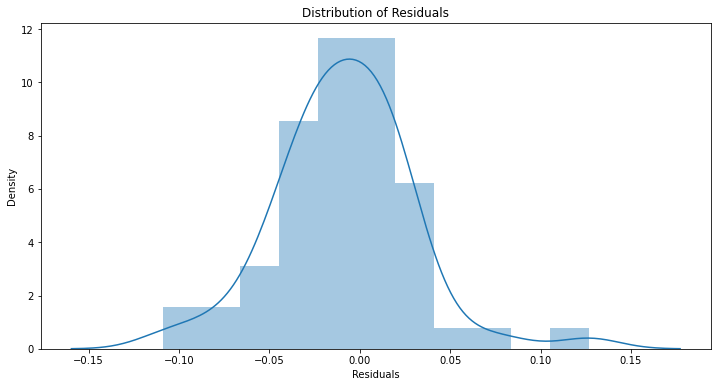


Assumption satisfied


In [36]:
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
   
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(residual_test['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < 0.05:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(residual_test['Residuals'])
    plt.show()
    
    print()
    if p_value > 0.05:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

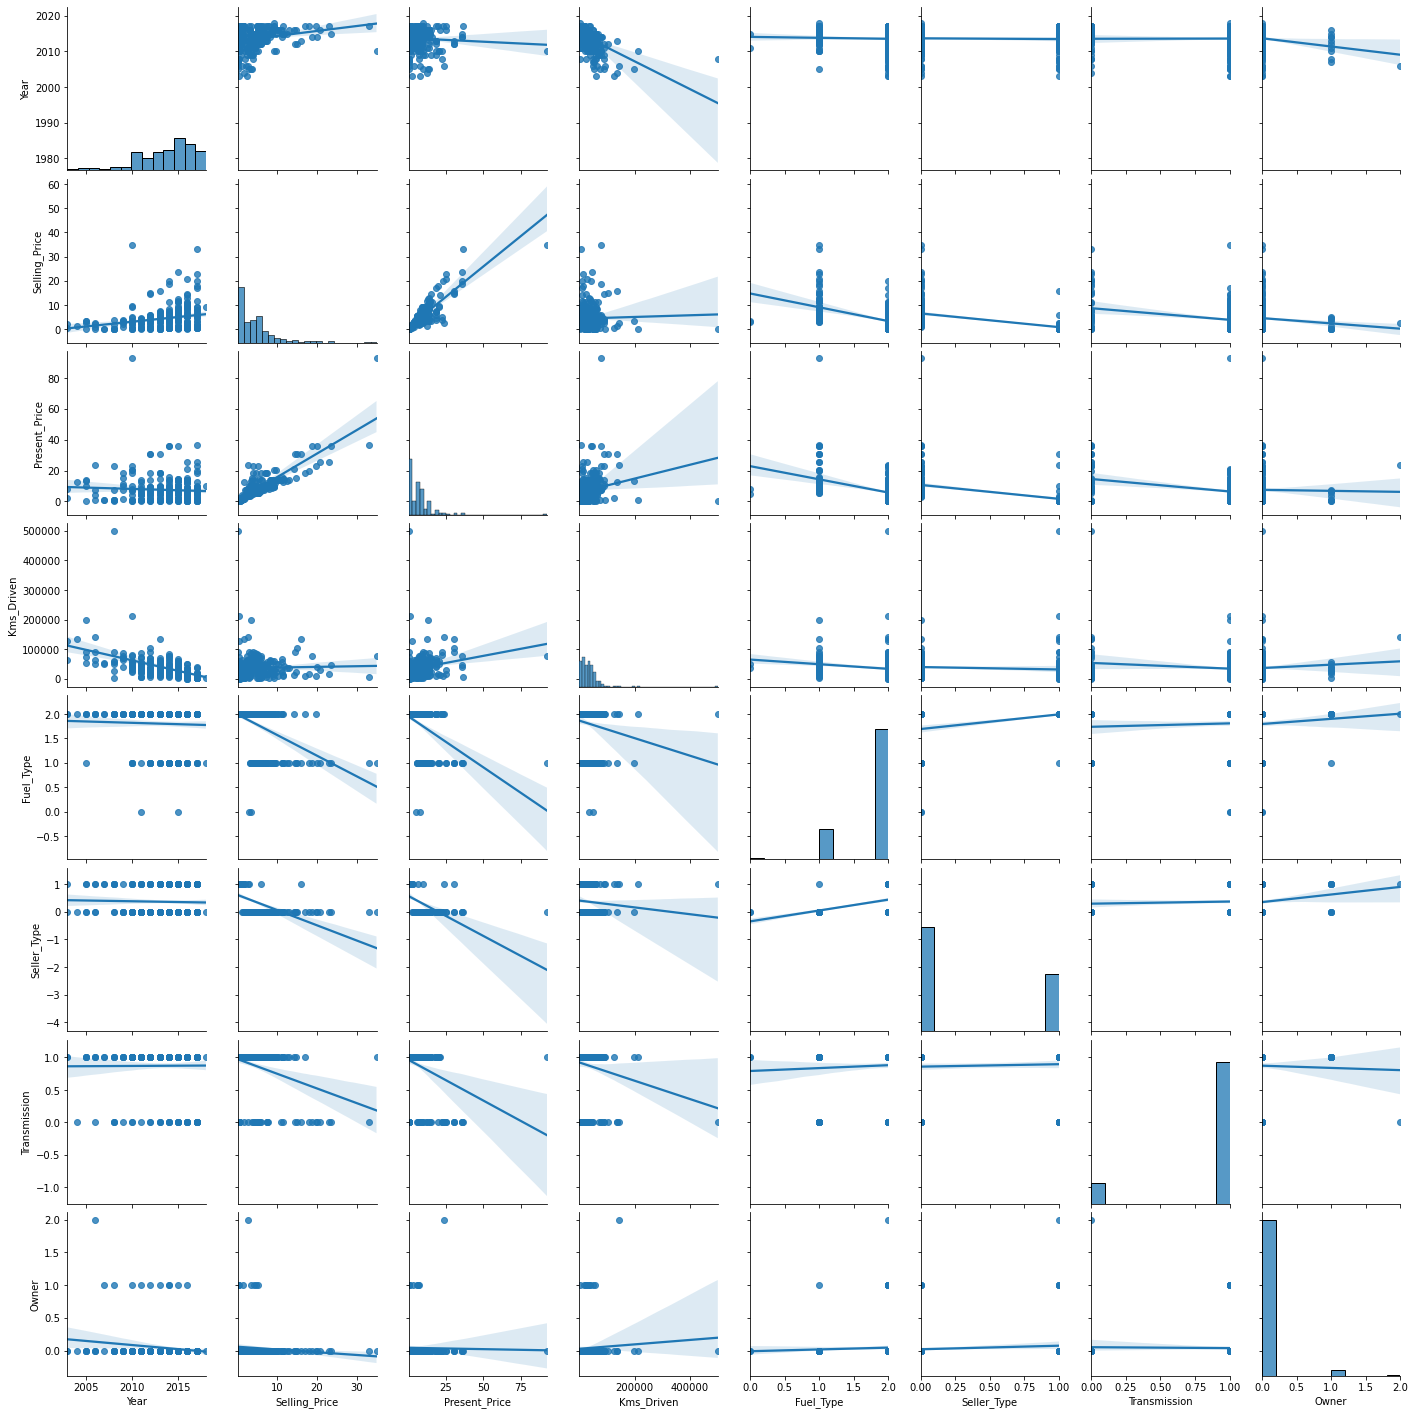

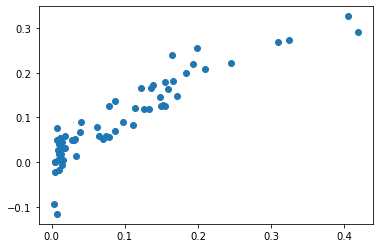

In [37]:
sns.pairplot(df, kind="reg")          ##Checking linear relationship between the dependent and independent variables
plt.show()
# Linearity assumption
plt.scatter(residual_test['Yactual'],residual_test['predictions'])
plt.show()

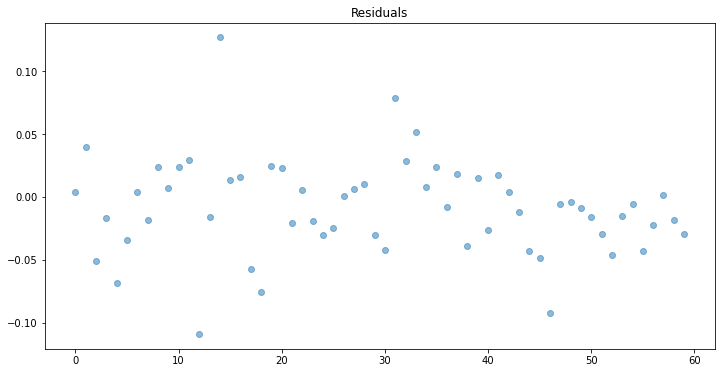

In [38]:
# Homoscedasticity    
plt.subplots(figsize=(12, 6))
plt.scatter(x=residual_test.index, y=residual_test.Residuals, alpha=0.5) 
plt.title('Residuals')
plt.show()                              ##This assumption is also satisfied because there is no pattern of residual like 
                                        ##fan shape or Bow tie shape etc

In [39]:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 5: Little to no multicollinearity among predictors')
        
    feature_names=X.columns
    

Assumption 5: Little to no multicollinearity among predictors


In [40]:
X2=X.values
X2
   

array([[0.73333333, 0.05305305, 1.        , ..., 0.        , 0.        ,
        0.0571088 ],
       [0.66666667, 0.08508509, 0.5       , ..., 0.        , 0.        ,
        0.09991331],
       [0.93333333, 0.01281281, 1.        , ..., 0.        , 0.        ,
        0.10327265],
       ...,
       [0.4       , 0.17504304, 1.        , ..., 0.        , 0.        ,
        0.11573472],
       [0.93333333, 0.01701702, 0.5       , ..., 0.        , 0.        ,
        0.1319896 ],
       [0.86666667, 0.00993794, 1.        , ..., 0.        , 0.        ,
        0.06046814]])

In [41]:
    VIF = [variance_inflation_factor(X2, i) for i in range(X2.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))

Year: 11.411809174492065
Kms_Driven: 2.0596322635158053
Fuel_Type: 13.656119842090696
Transmission: 6.95609659842076
Owner: 1.0784000763713872
Seller_Type: 2.1892155853941686
Present_Price: 2.3367631266291164


In [42]:
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')


2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [43]:
#Now dataset is fine for MLR
# Now we can predict the output on new input values other than test data

In [44]:
data = [[0.466667,0.099147,0.5,1.0,0.0,0.0,0.218140]]        ##Making dataframe for prediction on random value
dfs = pd.DataFrame(data, columns = ['Year','Kms_Driven','Fuel_Type','Transmission','Owner','Seller_Type','Present_Price'])

In [45]:
dfs

,Year,Kms_Driven,Fuel_Type,Transmission,Owner,Seller_Type,Present_Price
0,0.466667,0.099147,0.5,1.0,0.0,0.0,0.21814


In [46]:
lm.predict(dfs)      ## predicting on random value

array([[0.28228106]])